In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
classes = pd.read_csv('elliptic_txs_classes.csv')
features = pd.read_csv('elliptic_txs_features.csv', header=None)
features = features.rename(columns={1: "time step", 0:'txId'})
edgelist = pd.read_csv('elliptic_txs_edgelist.csv')

In [3]:
print('Shape of classes', classes.shape)
print('Shape of edges', edgelist.shape)
print('Shape of features', features.shape)

Shape of classes (203769, 2)
Shape of edges (234355, 2)
Shape of features (203769, 167)


In [4]:
classes.head(10)

,txId,class
0,230425980,unknown
1,5530458,unknown
2,232022460,unknown
3,232438397,2
4,230460314,unknown
5,230459870,unknown
6,230333930,unknown
7,230595899,unknown
8,232013274,unknown
9,232029206,2


In [5]:
features.head(10)

,txId,time step,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
5,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540
6,230333930,1,-0.171264,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.161887,...,-0.569626,-0.607306,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
7,230595899,1,-0.171755,-0.184668,-1.201369,-0.046932,-0.043875,-0.029140,-0.061584,-0.163552,...,0.969801,0.704641,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
8,232013274,1,-0.123127,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.112635,...,-0.128722,-0.235168,-0.979074,-0.978556,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399
9,232029206,1,-0.005027,0.578941,-0.091383,4.380281,-0.063725,4.667146,0.851305,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,0.604120,0.008632,-0.131155,0.333211,-0.120613,-0.119792


In [6]:
edgelist.head()

,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206


([<matplotlib.axis.XTick at 0x7fd4d8992ee0>,
 [Text(0, 0, 'Unknown'), Text(1, 0, 'licit'), Text(2, 0, 'ilicit')])

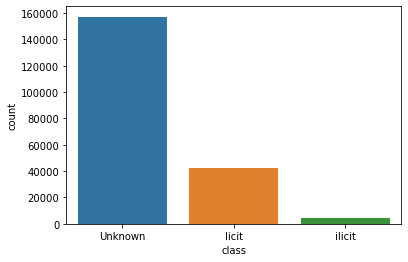

In [35]:
import seaborn as sns
sns.countplot(data = classes, x = 'class')
plt.xticks(np.arange(3), ('Unknown', 'licit', 'ilicit'))

<AxesSubplot:xlabel='time step'>

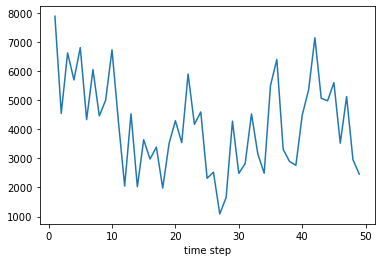

In [8]:
# number of transactions in each time step 
time_grp = features.groupby('time step').count()
time_grp['txId'].plot()

In [9]:
# relationship between time step and transaction classification 
merged_feature_class = pd.merge(features, classes, how = 'left', on='txId')

In [10]:
merge_grp = merged_feature_class.groupby(['time step', 'class']).count()
merge_grp = merge_grp['txId'].reset_index()
merge_grp_class1 = merge_grp[merge_grp['class'] == '1']
merge_grp_class2 = merge_grp[merge_grp['class'] == '2']
merge_grp_class3 = merge_grp[merge_grp['class'] == 'unknown']

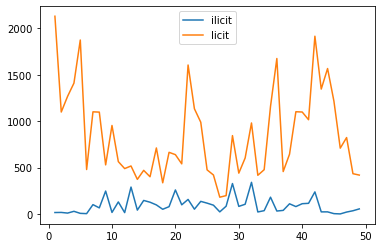

In [11]:
plt.plot(merge_grp_class1['time step'], merge_grp_class1['txId'])
plt.plot(merge_grp_class2['time step'], merge_grp_class2['txId'])
#plt.plot(merge_grp_class3['time step'], merge_grp_class3['txId'])
plt.legend(['ilicit', 'licit'])

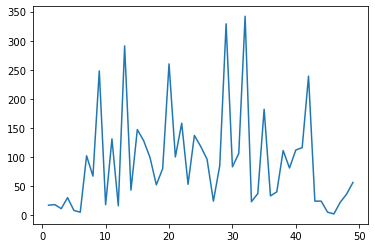

In [12]:
# for ilicit transcaction only 
plt.plot(merge_grp_class1['time step'], merge_grp_class1['txId'])

In [13]:
class1_new = merge_grp_class1.reset_index(drop = True)
class1_new = class1_new.drop('class', axis = 1)

In [14]:
new_time_grp = time_grp['txId'].reset_index()
percent = class1_new['txId'] / new_time_grp['txId'] * 100
new_df = pd.DataFrame(data = {'time step': new_time_grp['time step'], 'class1 percentage': percent})

([<matplotlib.axis.XTick at 0x7fd4c3987e80>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

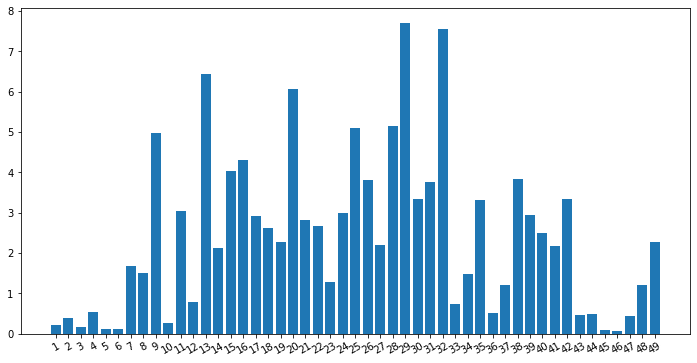

In [15]:
# show no. of class1 over total number
plt.figure(figsize = (12,6))
plt.bar(new_df['time step'], new_df['class1 percentage'])
plt.xticks(new_df['time step'], rotation = 30)

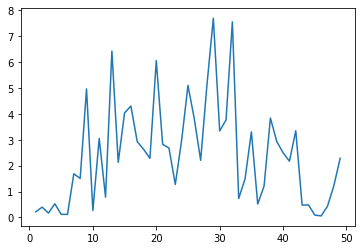

In [16]:
plt.plot(new_df['time step'], new_df['class1 percentage'])

In [18]:
!pip install decorator==5.0.9

You should consider upgrading via the '/Users/zhuxiaoxiao/opt/anaconda3/bin/python3 -m pip install --upgrade pip' command.


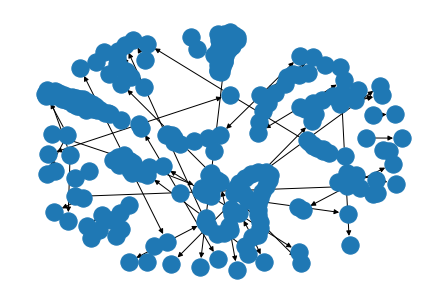

In [37]:
import networkx as nx
ilicit_ids = merged_feature_class.loc[(merged_feature_class['time step'] == 32) & (merged_feature_class['class'] == '1'), 'txId']
ilicit_edges = edgelist.loc[edgelist['txId1'].isin(ilicit_ids)]

graph = nx.from_pandas_edgelist(ilicit_edges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph)
nx.draw(graph, with_labels=False, pos=pos)

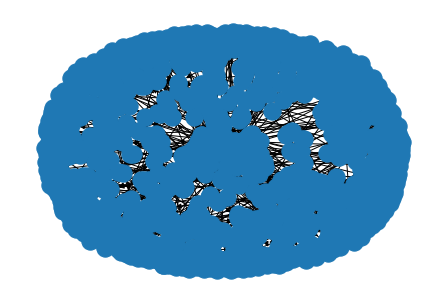

In [26]:
ilicit_ids = merged_feature_class.loc[(merged_feature_class['time step'] == 32) & (merged_feature_class['class'] == '2'), 'txId']
ilicit_edges = edgelist.loc[edgelist['txId1'].isin(ilicit_ids)]

graph = nx.from_pandas_edgelist(ilicit_edges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph)
nx.draw(graph, with_labels=False, pos=pos)